In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [5]:
data_set=pd.read_csv("netflix_stock_price.csv")
data_set

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


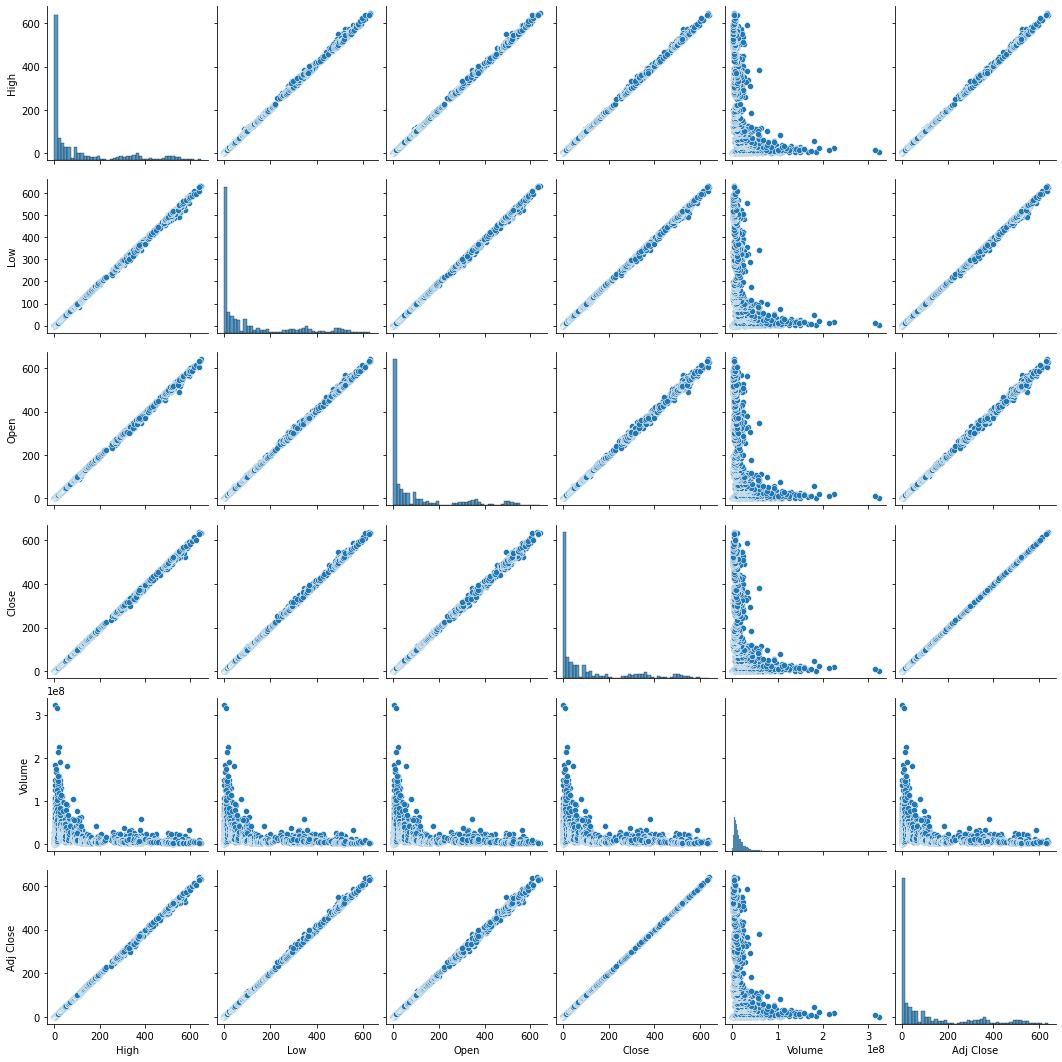

In [6]:
sns.pairplot(data_set)

In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [8]:
x=data_set.iloc[:,1:-1].values
y=data_set.iloc[:,-1].values

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Training Model

In [27]:
ann=tf.keras.models.Sequential()

In [28]:
ann.add(tf.keras.layers.Dense(units=6,activation="linear"))

In [29]:
ann.add(tf.keras.layers.Dense(units=6,activation="linear"))

In [30]:
ann.add(tf.keras.layers.Dense(units=1,activation="linear"))

In [31]:
ann.compile(loss="mean_squared_error",optimizer="adam")

In [32]:
ann.fit(x_train,y_train,epochs=120)

Epoch 1/120
122/122 [==============================] - 1s 1ms/step - loss: 34989.3047
Epoch 2/120
122/122 [==============================] - 0s 1ms/step - loss: 32130.8340
Epoch 3/120
122/122 [==============================] - 0s 1ms/step - loss: 25281.1328
Epoch 4/120
122/122 [==============================] - 0s 1ms/step - loss: 15291.8008
Epoch 5/120
122/122 [==============================] - 0s 1ms/step - loss: 7464.5586
Epoch 6/120
122/122 [==============================] - 0s 1ms/step - loss: 4050.6790
Epoch 7/120
122/122 [==============================] - 0s 1ms/step - loss: 2681.3501
Epoch 8/120
122/122 [==============================] - 0s 1ms/step - loss: 1799.5649
Epoch 9/120
122/122 [==============================] - 0s 1ms/step - loss: 1136.1266
Epoch 10/120
122/122 [==============================] - 0s 1ms/step - loss: 658.2673
Epoch 11/120
122/122 [==============================] - 0s 1ms/step - loss: 343.7772
Epoch 12/120
122/122 [==============================] - 0s 1m

In [35]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)

0.9999044548995993

In [38]:
r2_score(y_test,y_pred_test)

0.9998902903205018

## Linear regression

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [40]:
lin_reg.score(x_train,y_train)

1.0

In [41]:
lin_reg.score(x_test,y_test)

1.0

## Polynomial Regression

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
poly_x=poly.fit_transform(x_train)

In [69]:
lin_reg1=LinearRegression()
lin_reg1.fit(poly_x,y_train)

LinearRegression()

In [71]:
lin_reg1.score(poly_x,y_train)

1.0

In [73]:
lin_reg1.score(poly.fit_transform(x_test),y_test)

1.0

## SVR

In [48]:
from sklearn.svm import SVR
svr_reg=SVR(kernel="rbf")
svr_reg.fit(x_train,y_train)

SVR()

In [49]:
svr_reg.score(x_train,y_train)

0.9710454904808601

In [50]:
svr_reg.score(x_test,y_test)

0.970594342223277

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(criterion="squared_error")
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
tree_reg.score(x_train,y_train)

1.0

In [54]:
tree_reg.score(x_test,y_test)

0.9999781751542585

In [76]:
lin_train_score=lin_reg.score(x_train,y_train)
lin_test_score=lin_reg.score(x_test,y_test)

poly_y=poly.fit_transform(x_test)
poly_train_score=lin_reg1.score(poly_x,y_train)
poly_test_score=lin_reg1.score(poly_y,y_test)

svr_train_score=svr_reg.score(x_train,y_train)
svr_test_score=svr_reg.score(x_test,y_test)

dec_train_score=tree_reg.score(x_train,y_train)
dec_test_score=tree_reg.score(x_test,y_test)

ann_train_score=r2_score(y_train,y_pred_train)
ann_test_score=r2_score(y_test,y_pred_test)

In [77]:
score_y=["LinearRegression Train","LinearRegression Test","Polynomial Regression Train","Polynomial Regression Test","SVR Regression Train","SVR Regression Test","Descision Tree Classifier Train","Descision Tree Classifier Test","ANN Train","ANN Test"]
score_x=[lin_train_score,lin_test_score,poly_train_score,poly_test_score,svr_train_score,svr_test_score,dec_train_score,dec_test_score,ann_train_score,ann_test_score]

<AxesSubplot:>

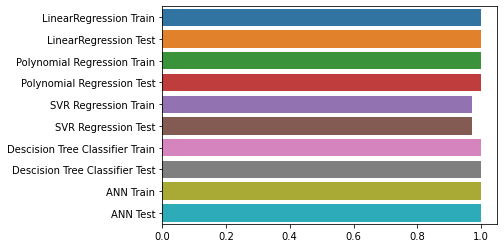

In [78]:
sns.barplot(x=score_x,y=score_y)